In [92]:
import pandas as pd

muse_df = pd.read_csv('museums.csv')

muse_df.info()

muse_df.describe()





/var/folders/20/24nsj1xx7y52k8m90_h_2r5h0000gp/T/ipykernel_16820/339929785.py:3: DtypeWarning: Columns (9,14,21) have mixed types. Specify dtype option on import or set low_memory=False.
  muse_df = pd.read_csv('museums.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33071 entries, 0 to 33070
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Museum ID                                 33071 non-null  int64  
 1   Museum Name                               33071 non-null  object 
 2   Legal Name                                33071 non-null  object 
 3   Alternate Name                            1927 non-null   object 
 4   Museum Type                               33071 non-null  object 
 5   Institution Name                          2749 non-null   object 
 6   Street Address (Administrative Location)  33061 non-null  object 
 7   City (Administrative Location)            33071 non-null  object 
 8   State (Administrative Location)           33071 non-null  object 
 9   Zip Code (Administrative Location)        33071 non-null  object 
 10  Street Address (Physical Location)

,Museum ID,Zip Code (Physical Location),Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Tax Period,Income,Revenue
count,3.307100e+04,9220.000000,33006.000000,33006.000000,32994.000000,30535.000000,33070.000000,33071.000000,23279.000000,2.296000e+04,2.228900e+04
mean,8.403812e+09,47801.849024,38.925193,-90.816268,2.505819,85.703652,29.065014,3.670043,201347.460200,1.069728e+08,2.097708e+07
std,2.662564e+06,30209.704635,5.126188,16.489097,1.211856,105.669618,15.430777,1.539280,67.671726,2.509342e+09,2.485252e+08
min,8.400100e+09,1002.000000,0.000000,-166.541260,1.000000,1.000000,1.000000,1.000000,199906.000000,-9.230000e+02,-1.799709e+06
25%,8.401801e+09,20180.000000,35.567140,-97.650768,1.000000,25.000000,17.000000,2.000000,201312.000000,0.000000e+00,0.000000e+00
50%,8.403600e+09,47447.000000,39.831340,-86.776675,2.000000,61.000000,29.000000,4.000000,201312.000000,8.772500e+03,3.310000e+03
75%,8.404801e+09,74743.000000,42.237400,-77.616740,4.000000,109.000000,42.000000,5.000000,201408.000000,2.164410e+05,1.676960e+05
max,8.409504e+09,99901.000000,70.669760,0.000000,4.000000,840.000000,90.000000,6.000000,201504.000000,8.318144e+10,5.840349e+09


In [93]:
muse_df = pd.read_csv('museums.csv')

state_count = muse_df['State (Administrative Location)'].value_counts()
city_count = muse_df['City (Administrative Location)'].value_counts()


# CA has the most museums per capita
print(state_count.idxmax())

# DE has the least museums per capita
print(state_count.idxmin())

# NYC has the most museums
print(city_count.idxmax())   

# Paupach has the least museums
print(city_count.idxmin())




CA
DE
NEW YORK
PAUPACH


/var/folders/20/24nsj1xx7y52k8m90_h_2r5h0000gp/T/ipykernel_16820/4257200135.py:1: DtypeWarning: Columns (9,14,21) have mixed types. Specify dtype option on import or set low_memory=False.
  muse_df = pd.read_csv('museums.csv')


In [94]:
type_count  = muse_df['Museum Type'].value_counts()
zoo_count = muse_df['Museum Name'].str.contains('zoo', case=False).sum()
aquarium_count = muse_df['Museum Name'].str.contains('AQUARIUM', case=False).sum()

# There are 564 zoos or aquariums in the USA
print(type_count)

# There are 289 zoos 
print(zoo_count)

# There are 111 aquariums
print(aquarium_count)

Museum Type
HISTORIC PRESERVATION                            14861
GENERAL MUSEUM                                    8698
ART MUSEUM                                        3241
HISTORY MUSEUM                                    2284
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER     1484
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM        1081
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION            564
CHILDREN'S MUSEUM                                  512
NATURAL HISTORY MUSEUM                             346
Name: count, dtype: int64
289
110


In [95]:
# Shows museum with the highest revenue and amount of revenue
max_revenue = muse_df['Revenue'].idxmax()

max_revenue_name = muse_df.loc[max_revenue, 'Museum Name']
max_revenue_number = muse_df.loc[max_revenue, 'Revenue']

print(max_revenue_name)
print(max_revenue_number)

FRED LAWRENCE WHIPPLE OBSERVATORY
5840349457.0


In [96]:
# the composition of the different museum types in the USA
type_composition = muse_df['Museum Type'].value_counts(normalize= True)

print(type_composition)

Museum Type
HISTORIC PRESERVATION                            0.449367
GENERAL MUSEUM                                   0.263010
ART MUSEUM                                       0.098001
HISTORY MUSEUM                                   0.069064
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER    0.044873
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM       0.032687
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION          0.017054
CHILDREN'S MUSEUM                                0.015482
NATURAL HISTORY MUSEUM                           0.010462
Name: proportion, dtype: float64


In [102]:
# statistical mesurment of the revenue & income of the museum types in the USA
revenue_and_income_stats = muse_df.groupby(['Revenue', 'Income'])['Museum Type'].value_counts(normalize=True)
print(revenue_and_income_stats)



Revenue        Income        Museum Type                                  
-1.799709e+06  3.811200e+05  GENERAL MUSEUM                                   1.00
-1.723674e+06  1.443401e+06  SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM       1.00
-5.988130e+05  1.942400e+05  SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM       1.00
-5.676300e+05  1.561679e+06  HISTORY MUSEUM                                   1.00
-4.960610e+05  1.812460e+05  GENERAL MUSEUM                                   1.00
                                                                              ... 
 5.840349e+09  8.318144e+10  SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM       0.20
                             ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER    0.15
                             ART MUSEUM                                       0.15
                             HISTORIC PRESERVATION                            0.05
                             NATURAL HISTORY MUSEUM                           0.05
Name: propor

State (Administrative Location)
AK    1.004114e+06
AL    2.023465e+06
AR    3.234783e+06
AZ    2.383515e+07
CA    2.790066e+07
CO    9.701295e+06
CT    7.208299e+07
DC    2.229338e+08
DE    4.632561e+07
FL    1.253726e+07
GA    3.282254e+07
HI    3.540033e+06
IA    6.290750e+06
ID    3.006555e+06
IL    2.783391e+07
IN    9.921964e+06
KS    9.341979e+05
KY    7.462724e+06
LA    1.869974e+07
MA    1.704354e+08
MD    5.866493e+07
ME    3.921195e+06
MI    2.225086e+06
MN    6.417199e+06
MO    1.343344e+07
MS    2.611419e+06
MT    8.132607e+05
NC    7.756243e+06
ND    1.061709e+05
NE    5.244708e+06
NH    1.098031e+07
NJ    6.112632e+06
NM    7.218771e+05
NV    8.223162e+05
NY    2.717556e+07
OH    4.622050e+06
OK    1.759307e+06
OR    3.626376e+06
PA    1.966357e+07
RI    4.068040e+07
SC    6.621070e+06
SD    3.574445e+06
TN    3.780729e+07
TX    1.079173e+07
UT    2.815471e+06
VA    5.103188e+06
VT    4.036958e+06
WA    5.638270e+06
WI    3.332476e+06
WV    1.662221e+06
WY    4.845174e+05

Text(0.5, 1.0, 'Average Revenue per State')

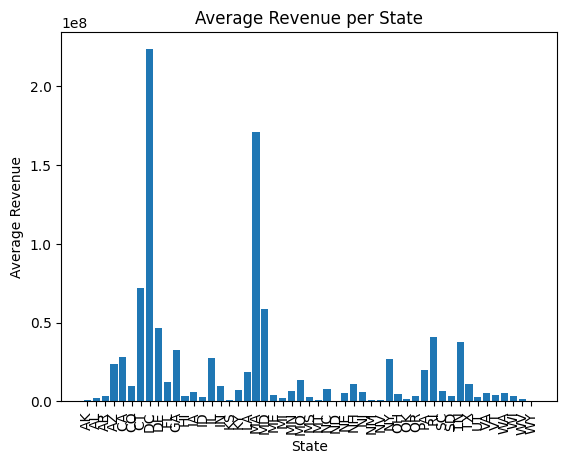

In [118]:
import matplotlib.pyplot as plt

state_revenue = muse_df.groupby('State (Administrative Location)')['Revenue'].mean()

print(state_revenue)

plt.bar(state_revenue.index, state_revenue)
plt.xticks(rotation= 90)
plt.xlabel('State')
plt.ylabel('Average Revenue')
plt.title('Average Revenue per State')



In [ ]:
!git add .
!git commit -m "Updated code for data analysis"